## Business Understanding 1<br>
<p>COLLABORATORS:  Griffin Lane, Ruhaab Markas, Tommy Pompo</p>
<div class="alert alert-warning">
<b>Assignment: </b>Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?<br><br>
</div>
<p class="lead">We have been hired by <em>Fungi Perfecti</em>,<em> Paul Stamet's Colorado branch</em>, to use publicly available data to determine areas where certain ectomycorrhizal fungi are likely to be present so they can retreive large amounts for study.  Ectomychorrizal fungi penetrate the root's epidermal and cortical layers and exchange nutrients that the roots would otherwise have trouble obtaining.  This intergrown lattice network of hyphae growing into the root is known as a Hartig Net. Mychorrhizal fungi are useful for reforrestation, gardening, and even the commercial production of produce. Since these specific ectomychorhizal fungi can only be found near Douglas-Firs and Ponderosa Pines, we are able to use the forest cover dataset to identify ares that are likely to meet the required growing conditions for this beneficial fungi to grow in the state of Colorado. This <a href="https://jupyter.org/">Jupyter notebook</a> will serve as a project document that will detail our process, assumptions, and results. </p>


<img src="http://drive.google.com/uc?export=view&id=1yLEdXwgkQMMHXJNhpQM6wftYf20XvRaA"/>

> <p>Above is a small example of the benefits of mycorrhizal fungi.  You can see the the pot on the left has no symbiotic relationship with a mychorrhizal fungus and is having trouble obtaining all the necessary water and nutrients to grow healthily.  The plant in the pot on the right is lush and healthy and clearly benefitting from it's relationship with the mychorrhizal fungi.  This is why the researchers wish to study the plethora of ectomycorrhizal fungi found around douglas firs and ponderosa pines; they are searching for new, robust species that can be used commercially as well as for reforrestation.  To clarify, ectomychorrhizal fungus is a subclass of mycorrhizal fungus.</p>

#### Measuring Effectiveness
> <p> We could definintely levearge these metrics in evaluating our model, but given the composition of our data, and the presenece of label classes, we will look at <b>Purity</b> as a measure of success for our clusters. Purity is a simple, yet robust, way of evaluating the accuracy of the clusters. Given that we have the predicted labels, we can use it to validate the quality of the clusters. Your data will not always have this luxury, but we belive this will allows us to meaningfully validate the model and share these results in . an interpretable manner. Each cluster is assigned to the class which is most frequent in the cluster, and then the accuracy of this assignment is measured by counting the number of correctly assigned documents and dividing by N. This allows us to measure the quality of the cluster in a simple and meaningful way. The forumla for calculating Purity is:
 
>![title](https://wikimedia.org/api/rest_v1/media/math/render/svg/6ce692b2f952dca7400b95d70699a6896adeeab8)

#### Modeling Efforts
> <p> The goal is to identify environments where well established communities of ectomycorrhizae specific to the douglas fir trees and  ponderosa pine trees are likely to be present. In particular, the researchers are looking for new, robust species they can use to repair the damage done by timber harvest and the controlled broadcast burns afterward.  There have been quite a few studies surveying the damage to ectomycorrhizae caused by these controlled burns, links can be found below. Since the most common trees to grow after the controlled burns are that of the douglas fir and ponderosa pine, it makes sense to look for robust species of ectomycorrhizae to inoculate the damaged soil with in order to re-establish the community of mycorrhizae and facilitate a faster recovery for the environment.  It makes sense to use clustering in order to predict areas where researchers are likely to find new beneficial ectomycorrhizal fungi using this dataset since it contains variables for distance to fire sites, as well as water, and is designed for training a classification algorithm for forest cover type.</p>

<p>Since we are looking at Colorado specifically these papers in particular make sense to review:
https://forest.moscowfsl.wsu.edu/smp/solo/documents/GTRs/INT_280/DeBano_INT-280.php
https://forest.moscowfsl.wsu.edu/smp/solo/documents/GTRs/INT_280/print/Amaranthus.html</p>

## Data Understanding 1
<div class="alert alert-warning">
<b>Assignment: </b>Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?
<br><br>
</div>

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Add some style
plt.style.use(['seaborn-dark-palette'])

#Import dataset
df = pd.read_csv("covtype.csv")

In [2]:
#View column names
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area1                      581012 non-null int64
Wilderness_Area2                      581012 non-null int64
Wilderness_Area3                      581012 non-null int64
Wilderness_Area4                      581012 non-null int64
Soil_Type1                            581012 non-

# Forest Covertype data


### Relevant Information Paragraph:

	Predicting forest cover type from cartographic variables only
	(no remotely sensed data).  The actual forest cover type for
	a given observation (30 x 30 meter cell) was determined from
	US Forest Service (USFS) Region 2 Resource Information System 
	(RIS) data.  Independent variables were derived from data
	originally obtained from US Geological Survey (USGS) and
	USFS data.  Data is in raw form (not scaled) and contains
	binary (0 or 1) columns of data for qualitative independent
	variables (wilderness areas and soil types).

	This study area includes four wilderness areas located in the
	Roosevelt National Forest of northern Colorado.  These areas
	represent forests with minimal human-caused disturbances,
	so that existing forest cover types are more a result of 
	ecological processes rather than forest management practices.

	Some background information for these four wilderness areas:  
	Neota (area 2) probably has the highest mean elevational value of 
	the 4 wilderness areas. Rawah (area 1) and Comanche Peak (area 3) 
	would have a lower mean elevational value, while Cache la Poudre 
	(area 4) would have the lowest mean elevational value. 

	As for primary major tree species in these areas, Neota would have 
	spruce/fir (type 1), while Rawah and Comanche Peak would probably
	have lodgepole pine (type 2) as their primary species, followed by 
	spruce/fir and aspen (type 5). Cache la Poudre would tend to have 
	Ponderosa pine (type 3), Douglas-fir (type 6), and 
	cottonwood/willow (type 4).  

	The Rawah and Comanche Peak areas would tend to be more typical of 
	the overall dataset than either the Neota or Cache la Poudre, due 
	to their assortment of tree species and range of predictive 
	variable values (elevation, etc.)  Cache la Poudre would probably 
	be more unique than the others, due to its relatively low 
	elevation range and species composition. 


### Attribute information:

Given is the attribute name, attribute type, the measurement unit and
a brief description.  The forest cover type is the classification 
problem.  The order of this listing corresponds to the order of 
numerals along the rows of the database.
<pre style="font-size: 8;word-wrap: break-word;">

Name                                   Data Type    Measurement                       Description

Elevation                            quantitative   meters                       Elevation in meters
Aspect                               quantitative   azimuth                      Aspect in degrees azimuth
Slope                                quantitative   degrees                      Slope in degrees
Horizontal_Distance_To_Hydrology     quantitative   meters                       Horz Dist to nearest 
                                                                                 surface water features
Vertical_Distance_To_Hydrology       quantitative   meters                       Vert Dist to nearest
                                                                                 surface water features
Horizontal_Distance_To_Roadways      quantitative   meters                       Horz Dist to nearest roadway
Hillshade_9am                        quantitative   0 to 255 index               Hillshade index at 9am, summer solstice
Hillshade_Noon                       quantitative   0 to 255 index               Hillshade index at noon, summer soltice
Hillshade_3pm                        quantitative   0 to 255 index               Hillshade index at 3pm, summer solstice
Horizontal_Distance_To_Fire_Points   quantitative   meters                       Horz Dist to nearest wildfire
                                                                                 ignition points
Wilderness_Area (4 binary columns)   qualitative    0 (absence) or 1 (presence)  Wilderness area designation
Soil_Type (40 binary columns)        qualitative    0 (absence) or 1 (presence)  Soil Type designation
Cover_Type (7 types)                 integer        1 to 7                       Forest Cover Type designation
</pre>
<hr>

<pre style="font-size: 8;word-wrap: break-word;">
Name                               Measurement Scale    Measurement                       Description

Elevation                            Continuous         meters                      Elevation in meters
Aspect                               Continuous         azimuth                     Aspect in degrees azimuth
Slope                                Continuous         degrees                     Slope in degrees
Horizontal_Distance_To_Hydrology     Continuous         meters                      Horz Dist to nearest 
                                                                                    surface water features
Vertical_Distance_To_Hydrology       Continuous         meters                      Vert Dist to nearest
                                                                                    surface water features
Horizontal_Distance_To_Roadways      Continuous         meters                      Horz Dist to nearest roadway
Hillshade_9am                        Ordinal            0 to 255 index              Hillshade index at 9am, summer solstice
Hillshade_Noon                       Ordinal            0 to 255 index              Hillshade index at noon, summer soltice
Hillshade_3pm                        Ordinal            0 to 255 index              Hillshade index at 3pm, summer solstice
Horizontal_Distance_To_Fire_Points   Continuous         meters                      Horz Dist to nearest wildfire
                                                                                    ignition points
Wilderness_Area (4 binary columns)   Nominal            0 (absence) or 1 (presence) Wilderness area designation
Soil_Type (40 binary columns)        Nominal            0 (absence) or 1 (presence) Soil Type designation
Cover_Type (7 types)                 Nominal            1 to 7                      Forest Cover Type designation
</pre>

<pre style="word-wrap: break-word; white-space: pre-wrap;">
Code Designations:

    Wilderness Areas:   1 -- Rawah Wilderness Area
                        2 -- Neota Wilderness Area
                        3 -- Comanche Peak Wilderness Area
                        4 -- Cache la Poudre Wilderness Area

Soil Types:             1 to 40 : based on the USFS Ecological
                        Landtype Units (ELUs) for this study area:

  Study Code USFS ELU Code			Description
	 1	   2702		Cathedral family - Rock outcrop complex, extremely stony.
	 2	   2703		Vanet - Ratake families complex, very stony.
	 3	   2704		Haploborolis - Rock outcrop complex, rubbly.
	 4	   2705		Ratake family - Rock outcrop complex, rubbly.
	 5	   2706		Vanet family - Rock outcrop complex complex, rubbly.
	 6	   2717		Vanet - Wetmore families - Rock outcrop complex, stony.
	 7	   3501		Gothic family.
	 8	   3502		Supervisor - Limber families complex.
	 9	   4201		Troutville family, very stony.
	10	   4703		Bullwark - Catamount families - Rock outcrop complex, rubbly.
	11	   4704		Bullwark - Catamount families - Rock land complex, rubbly.
	12	   4744		Legault family - Rock land complex, stony.
	13	   4758		Catamount family - Rock land - Bullwark family complex, rubbly.
	14	   5101		Pachic Argiborolis - Aquolis complex.
	15	   5151		unspecified in the USFS Soil and ELU Survey.
	16	   6101		Cryaquolis - Cryoborolis complex.
	17	   6102		Gateview family - Cryaquolis complex.
	18	   6731		Rogert family, very stony.
	19	   7101		Typic Cryaquolis - Borohemists complex.
	20	   7102		Typic Cryaquepts - Typic Cryaquolls complex.
	21	   7103		Typic Cryaquolls - Leighcan family, till substratum complex.
	22	   7201		Leighcan family, till substratum, extremely bouldery.
	23	   7202		Leighcan family, till substratum - Typic Cryaquolls complex.
	24	   7700		Leighcan family, extremely stony.
	25	   7701		Leighcan family, warm, extremely stony.
	26	   7702		Granile - Catamount families complex, very stony.
	27	   7709		Leighcan family, warm - Rock outcrop complex, extremely stony.
	28	   7710		Leighcan family - Rock outcrop complex, extremely stony.
	29	   7745		Como - Legault families complex, extremely stony.
	30	   7746		Como family - Rock land - Legault family complex, extremely stony.
	31	   7755		Leighcan - Catamount families complex, extremely stony.
	32	   7756		Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
	33	   7757		Leighcan - Catamount families - Rock outcrop complex, extremely stony.
	34	   7790		Cryorthents - Rock land complex, extremely stony.
	35	   8703		Cryumbrepts - Rock outcrop - Cryaquepts complex.
	36	   8707		Bross family - Rock land - Cryumbrepts complex, extremely stony.
	37	   8708		Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
	38	   8771		Leighcan - Moran families - Cryaquolls complex, extremely stony.
	39	   8772		Moran family - Cryorthents - Leighcan family complex, extremely stony.
	40	   8776		Moran family - Cryorthents - Rock land complex, extremely stony.

        Note:   First digit:  climatic zone             Second digit:  geologic zones
                1.  lower montane dry                   1.  alluvium
                2.  lower montane                       2.  glacial
                3.  montane dry                         3.  shale
                4.  montane                             4.  sandstone
                5.  montane dry and montane             5.  mixed sedimentary
                6.  montane and subalpine               6.  unspecified in the USFS ELU Survey
                7.  subalpine                           7.  igneous and metamorphic
                8.  alpine                              8.  volcanic

        The third and fourth ELU digits are unique to the mapping unit 
        and have no special meaning to the climatic or geologic zones.

    Forest Cover Type Classes:	1 -- Spruce/Fir
                                2 -- Lodgepole Pine
                                3 -- Ponderosa Pine
                                4 -- Cottonwood/Willow
                                5 -- Aspen
                                6 -- Douglas-fir
                                7 -- Krummholz

======================================================================================
Relevant sources can be found at:  
https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.info
======================================================================================
</pre>

#### Missing Values

In [3]:
#Get percent NA and sort them
missing_values = df.isnull().sum()/len(df)
missing_values = missing_values.sort_values(ascending=False)
print(missing_values)

Cover_Type                            0.0
Wilderness_Area4                      0.0
Soil_Type11                           0.0
Soil_Type10                           0.0
Soil_Type9                            0.0
Soil_Type8                            0.0
Soil_Type7                            0.0
Soil_Type6                            0.0
Soil_Type5                            0.0
Soil_Type4                            0.0
Soil_Type3                            0.0
Soil_Type2                            0.0
Soil_Type1                            0.0
Wilderness_Area3                      0.0
Soil_Type13                           0.0
Wilderness_Area2                      0.0
Wilderness_Area1                      0.0
Horizontal_Distance_To_Fire_Points    0.0
Hillshade_3pm                         0.0
Hillshade_Noon                        0.0
Hillshade_9am                         0.0
Horizontal_Distance_To_Roadways       0.0
Vertical_Distance_To_Hydrology        0.0
Horizontal_Distance_To_Hydrology  

> <p><b>Interpretation: </b><p> The executed code above outlines the percentage of overall missing values for each attribute. There are no missing values in this data set, which is a nice change from what we usually encounter. This is not typically the case but analyzing missing values is always one of the first steps in exploratory data analysis (EDA). If there were missing values present, we would evaluate the extent of missing values across each impacted variable. Knowing the severity of this problem allows us to determine a strategy to handle these missing values. Some approaches, that we have implemented in prior labs, include dropping missing values for certain thresholds, and imputing new values using an aggregation (e.g mean/average). Imputation is a useful exercise but is not always applicable. Understanding the the attribute, and it's business context, is critical so that you can be confident that imputations  fit the variance and cardinality of the attribute. Given that there are no missing values, we will not need to take those approaches. </p>

#### Outlier Detection

> $$ M_{i} = \frac{0.6745(x_{i} - \tilde{x})} {\mbox{MAD}}$$
It is common practice to use z-scores to find outliers but it is recommended to use the modiefied z-score formula as shown above since the maximum value a z-score could be oterwise is:
$$ (n-1)/\sqrt{n}  $$

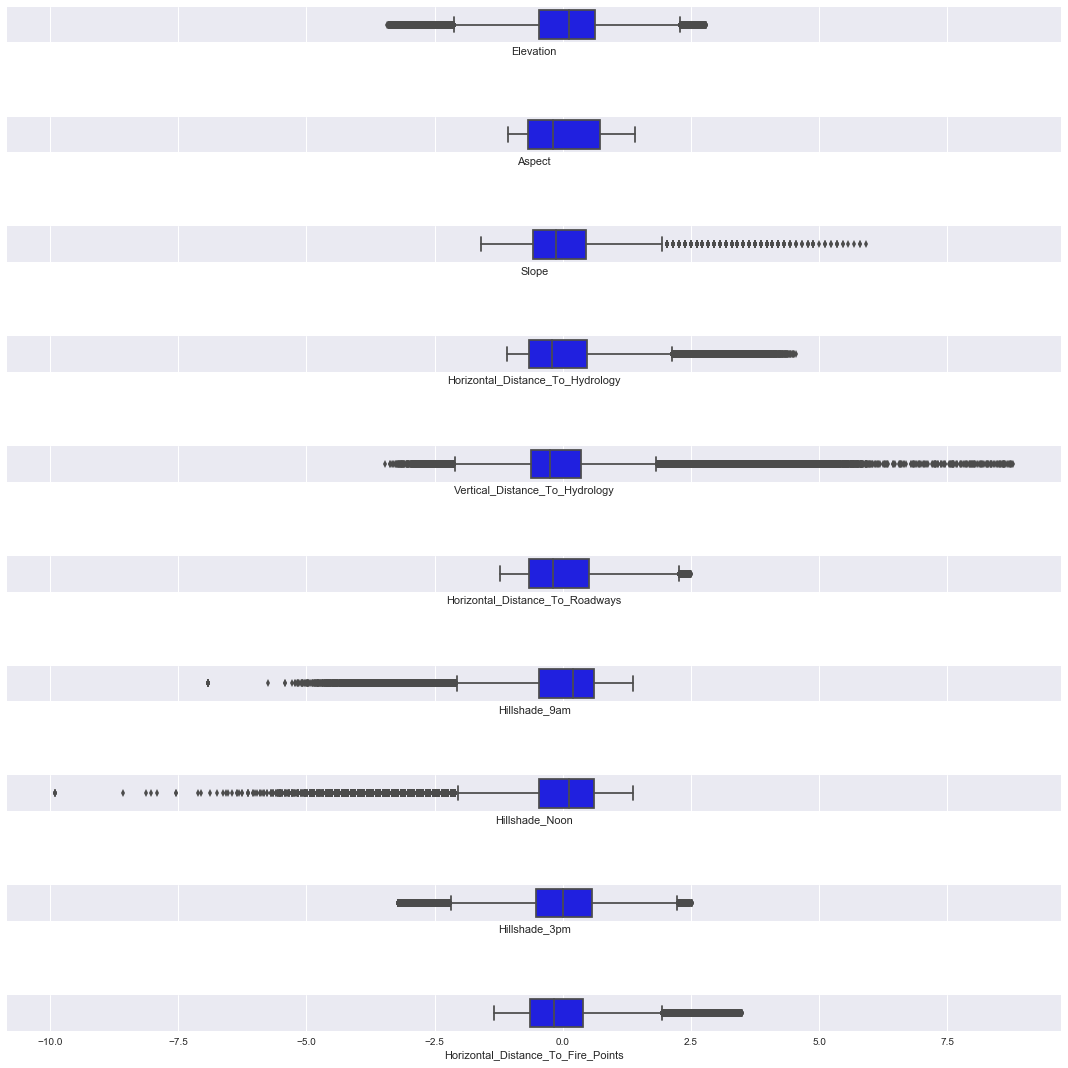

In [4]:
## Outliers
import sys
z_scores = (df - df.mean())/(df.std()+sys.float_info.epsilon)

def get_MAD_zscores(dataset):
    return (.6745*(dataset-dataset.mean()))/pd.DataFrame.mad(dataset)

outliers =get_MAD_zscores(df)

def plot_distributions(df):
    fig, axarr = plt.subplots(len(df.columns),1, sharex=True, figsize=[15,15])
    for i, col in enumerate(df.columns):
#         axarr[i].title.set_text(col)
        sns.boxplot(df[col], color="blue", ax=axarr[i])
    plt.tight_layout(h_pad=5)
plot_distributions(outliers.iloc[:,0:10])

> <p><b>Interpretation: </b><p>The distributions of the columns, indicated with a modified z-score (see Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and Handle Outliers"), look pretty good.  There are a few  </p>

In [5]:
## Duplicate Data Check
df.duplicated().sum()/len(df)*100

0.0

> <p><b>Interpretation: </b><p>We have absolutely zero duplicate data entries in this dataset, another welcome surprise.  This means that we can be relatively confident in the integrity of our data. </p>

## Data Understanding 2
<div class="alert alert-warning">
<b>Assignment: </b>Visualize the any important attributes appropriately. Important: Provide an interpretation for any charts or graphs.
<br><br>
</div>

> <p>Before we begin, we should make a variable for colorizing our cover types.  this will allow us to learn useful things about our target environment as we explore the relationships between our data.  We will use the <font color='blue'>blue</font> spectrum for observations that are in a desirable habitat and the <font color='red'>red</font> spectrum for the undesired environments.</p>

In [6]:

#colorize the desired cover types with blue spectrum colors
#  the undesired cover types get red spectrum colors
colors = ["red","#aa0000","#0000ff","darkred","magenta","#009999","lightpink"]

cust_colors =  [colors[x-1] for x in df.Cover_Type]

<function matplotlib.pyplot.show>

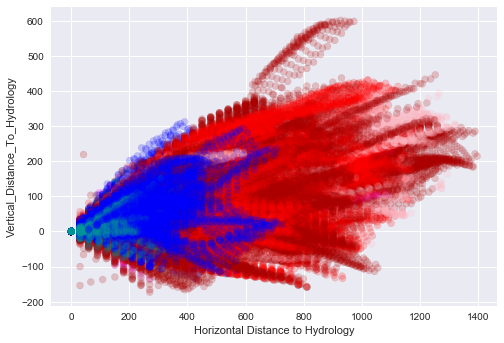

In [7]:
X = df['Horizontal_Distance_To_Hydrology'] 
Y = df['Vertical_Distance_To_Hydrology']  


plt.scatter(X, Y, c=cust_colors, alpha =.2) 
plt.ylabel('Vertical_Distance_To_Hydrology')
plt.xlabel('Horizontal Distance to Hydrology')
plt.show

> <p><b>Interpretation: </b>We can see that our desired environment is concentrated around water.  In particular, our desired environment does not appear to be common at large vertical distances from bodies of water.  This makes sense for fungi as they are composed of anywhere from around 60% to 95% water typically and would benefit from moisture in the ground.  It would be interesting to see if there is a relationship with elevation as well.</p>

<function matplotlib.pyplot.show>

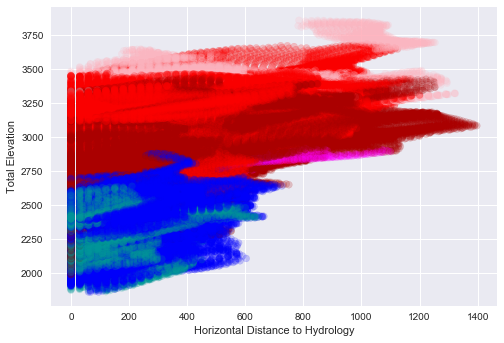

In [8]:
X = df['Horizontal_Distance_To_Hydrology'] 
Y = df['Elevation']  
plt.scatter(X, Y, c=cust_colors, alpha=.2) 
plt.ylabel('Total Elevation')
plt.xlabel('Horizontal Distance to Hydrology')
plt.show

> <p><b>Interpretation: </b><p> This visualization shows how higher elevations have a greater variance among the distances to the nearest body of water.  Lower elevations are almost always very nearby to water, which makes sense since the water runs down from the melting snow caps in Colorado's Rocky Mountains and forms deltas and lakes at the lower elevations. Since we colorized it according to our spectrum of <b><font color='blue'>good</font></b> vs <b><font color='red'>bad</font></b> with the <font color='blue'>blue</font> spectrum observations being good and the undesired environments represented in the <font color='red'>red</font> spectrum, we can clearly see that our desired environment seems to be at the lower elevations, close to bodies of water.  That information alone will allow us to provide the researchers with useful information that will keep them from looking the wrong habitats and wasting valuable resources in the field.</p>

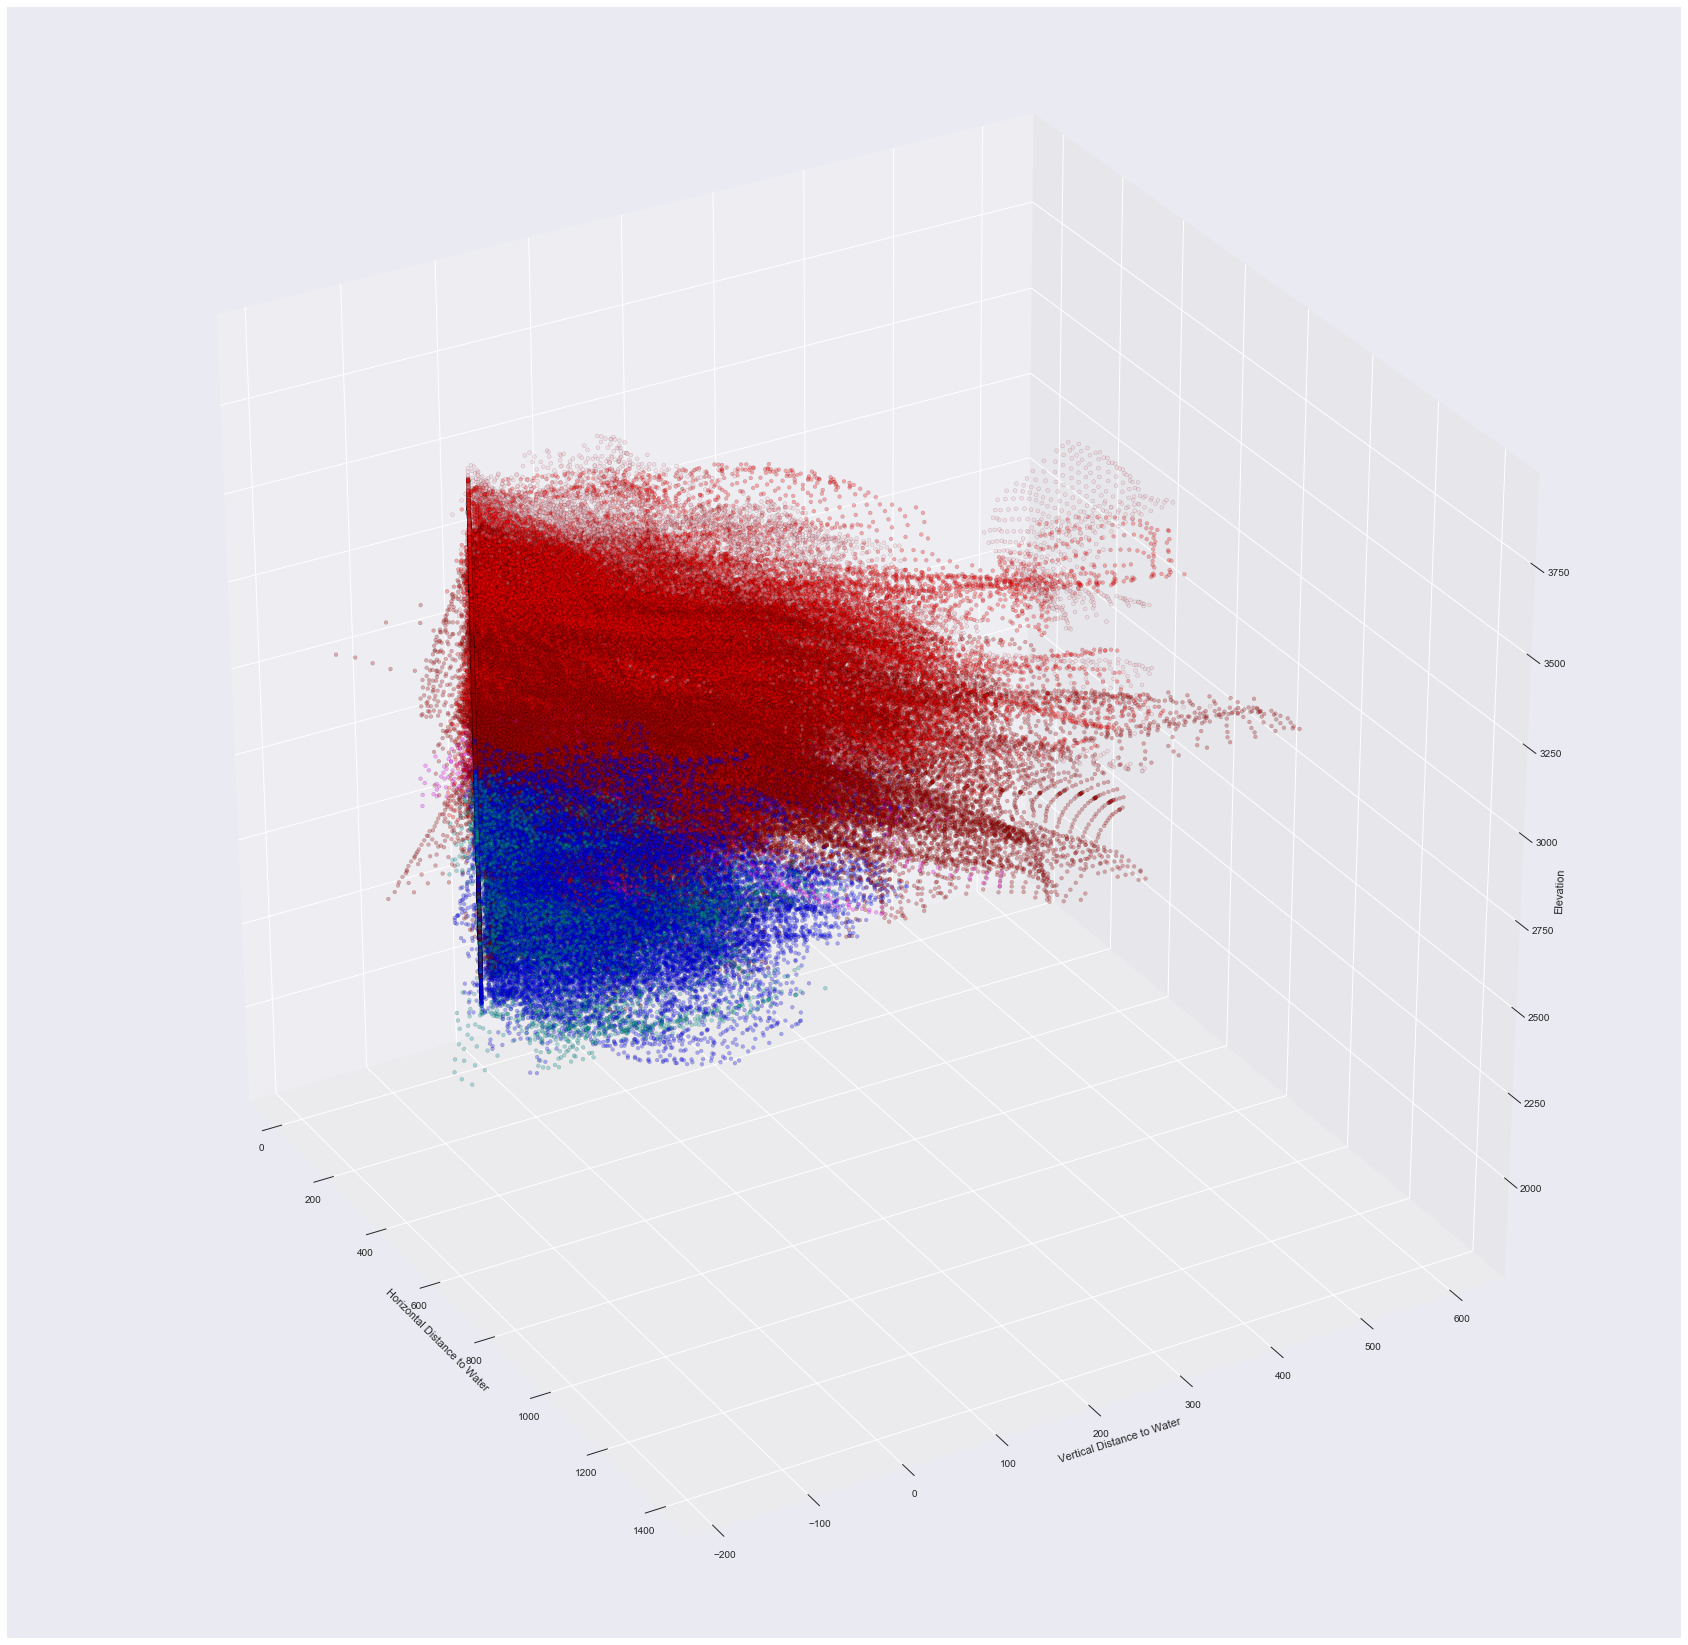

In [9]:
from mpl_toolkits.mplot3d import Axes3D

X = df['Horizontal_Distance_To_Hydrology']
Y = df['Vertical_Distance_To_Hydrology']
Z = df['Elevation'] 

threedee = plt.figure(figsize=[30,30]).gca(projection='3d')

fig = threedee.scatter(X, Y, Z, c=cust_colors, s=15,
                           edgecolor='none', alpha=.3) 

threedee.set_xlabel('Horizontal Distance to Water')
threedee.set_ylabel('Vertical Distance to Water')
threedee.set_zlabel('Elevation')

# rotate the axes and update
for angle in range(0, 360, 30):
    fig.axes.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

> <p><b>Interpretation: </b>stuff goes here..........................</p>

#### Domain Knowledge Check
At this point, since we aren't necessarily looking just for douglas fir trees but rather douglas fir tree and ponderosa pines likely to be associated with well establish ectomycorrhizae. 
> <p>Wright and Tarrant (1958) found fewer ectomycorrhizae on Douglas-fir seedlings growing in burned, compared to unburned, clearcuts. The greatest reductions were associated with the hottest burns. Thus, not only the type of activity, but its severity, is critical. Parke and others (1984) compared mycorrhiza formation in soils from burned and unburned clearcuts of 36 "difficult to regenerate" sites in northwestern California and southwestern Oregon.

In [ ]:
# %pylab
plt.clf()
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[30,30])
ax = fig.add_subplot(111, projection='3d')

# load some test data for demonstration and plot a wireframe
X, Y, Z = axes3d.get_test_data(0.1)
ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)

# rotate the axes and update
for angle in range(0, 360, 30):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)
plt.show()

> <p><b>Interpretation: </b><p>I did shit. </p>

In [ ]:
from matplotlib.patches import Rectangle
kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True)

plt.figure(figsize=(10,10))


handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [colors[x] for x in range(7)]]
labels= ["Spruce/Fir", "Lodgepole Pine", "Ponderosa Pine", 
         "Cottonwood/Willow", "Aspen", "Douglas-fir", "Krummholz"]
plt.legend(handles, labels)

for i in range(7):
    plt.hist(df[df.Cover_Type==i+1].Elevation, color=colors[i], **kwargs)    
    plt.xlabel('Elevation (m)')
    plt.title('Elevation of Cover Types')

> <p><b>Interpretation:</b> The plot above shows the distributions of the different cover types at different elevations.  The desired cover types have been colorized with blue spectrum colors in order to help illustrate the feature space separation between these two cover types and others.  We can see that elevations above 2800m can be safely ignored if we do not wish to send the researchers off to a location unlikely to contain the ectomycorrhizal fungi they are seeking.  We can see that the overlap between our two species is almost total as well.</p>

In [ ]:
sns.factorplot(kind='box', y='Elevation', x='Cover_Type',
               data=df, size=8, aspect=1.5, legend_out=False)

In [ ]:
#These are the attributes we will check for correlation between
[df.columns[x] for x in range(14)]

In [ ]:
#Leaving off the soil types as they are not correlated and obscure the rest of the columns
# that actually have magnitudes greater than .2 or so for their correlation coefficient.
Cor = df.iloc[:,0:14]
corr = Cor.corr()
plt.figure(figsize=[15,10])
sns.heatmap(corr,annot=True, fmt=".1", cmap="RdBu")

> <p><b>Interpretation: </b> The correlation matrix above shows the relationships between variables and colorizes them based on the trend direction and saturates that color by the magnitude of the slope in the trend.  In this way, we can easily visually determine attributes that are too representative of eachother and become redundant input for our algorithm.  Some things make sense to be strongly correlated however.  If you notice, the hillshade measurement at 9am and 3pm are negatively correlated.  This is likely due to the heading of the ground normals on the slope of the terrain.  Aspect, being a measure of this heading, is also understandably related to the hillshade attribute.  To elaborate further, one faces a direction in which it is obscured by higher elevations as the sun moves across the sky but receives more light than the opposing side of the elevated landmass.</p>

> <p>All things considered this correlation matrix looks fantastic and is ideal for analysis. We see no need to modify or remove any attributes of this dataset.  We will proceed with the dataset in tact.
</p>

In [ ]:
from sklearn.model_selection import train_test_split

#get y's
y = df.Cover_Type

#get all but y, also drop duration as it is not suitable for prediction
X = df.drop(["Cover_Type"], axis=1)

#quick and dirty one hot encoding, could have used sklearn's as well
def OneHot(dataset):
    if type(dataset) is pd.Series:
        return [0  if (x == "no") else 1 for x in df.y]    
    else:
        cats = dataset.select_dtypes(include=[np.object])
        cats_cols = cats.columns

    for i in enumerate(cats_cols):
        i = i[1]            
        one_h = pd.get_dummies(dataset[i])
        dataset = dataset.drop(i,axis=1)
        dataset[one_h.columns] = one_h        
    return dataset

X, y = OneHot(X), OneHot(y)



### Without External Cross Validation
# X_train = X
# y_train= pd.Series(y)

### With external cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)
y_train, y_test = pd.Series(y_train), pd.Series(y_test)

## Modeling and Evaluation 1
<div class="alert alert-warning">
<b>Assignment: </b>Train and adjust parameters

<br><br>
</div>

## Modeling and Evaluation 2
<div class="alert alert-warning">
<b>Assignment: </b>Evaluate and Compare
<br><br>
</div>

## Modeling and Evaluation 3
<div class="alert alert-warning">
<b>Assignment: </b>Visualize Results
<br><br>
</div>

## Modeling and Evaluation 4
<div class="alert alert-warning">
<b>Assignment: </b>Summarize the Ramifications
<br><br>
</div>

## Deployment 
<div class="alert alert-warning">
<b>Assignment: </b>Be critical of your performance and tell the reader how you current model might be usable by other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling? How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?
<br><br>
</div>


## Exceptional Work
<div class="alert alert-warning">
<b>Assignment: </b>You have free reign to provide additional analyses or combine analyses. Ensemble Method recommended.

<br><br>
</div>


Dataset Sources:

	(a) Original owners of database:
		Remote Sensing and GIS Program
		Department of Forest Sciences
		College of Natural Resources
		Colorado State University
		Fort Collins, CO  80523
		(contact Jock A. Blackard, jblackard 'at' fs.fed.us
		      or Dr. Denis J. Dean, denis.dean 'at' utdallas.edu)

	NOTE:	Reuse of this database is unlimited with retention of 
		copyright notice for Jock A. Blackard and Colorado 
		State University.

	(b) Donors of database:
		Jock A. Blackard (jblackard 'at' fs.fed.us)
		GIS Coordinator
		USFS - Forest Inventory &amp; Analysis
		Rocky Mountain Research Station
		507 25th Street
		Ogden, UT 84401

		Dr. Denis J. Dean (denis.dean 'at' utdallas.edu)
		Professor
		Program in Geography and Geospatial Sciences
		School of Economic, Political and Policy Sciences
		800 West Campbell Rd
		Richardson, TX  75080-3021 
		
		Dr. Charles W. Anderson (anderson 'at' cs.colostate.edu)
		Associate Professor
		Department of Computer Science
		Colorado State University
		Fort Collins, CO  80523  USA

	(c) Date donated:  August 1998